In [1]:
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib as plt

In [2]:
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mech2013",
    database="details"
)
cursor = db.cursor()

In [3]:
query='select * from details.survey_data'
df= pd.read_sql(sql=query , con =db)
df =df.drop(['id'], axis=1)
df ['Age'] = (pd.to_datetime("today").date()-df.iloc[:,1])// pd.Timedelta(days=365.25)
sort_df = df.sort_values(by =['Age'] , ascending=True,ignore_index=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
Survey_count = df.shape[0]
Survey_count

11

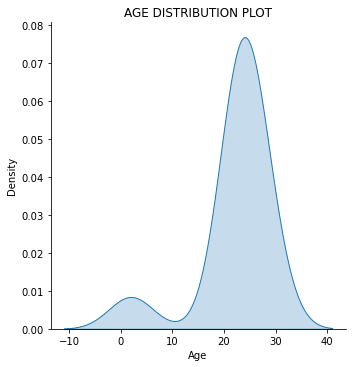

In [5]:
sns.displot(data =sort_df, x= 'Age',kind='kde', fill= True).set(title="AGE DISTRIBUTION PLOT") 
plt.pyplot.savefig(r'F:\PROJECTS\survey_forms\Age_dis',bbox_inches='tight')

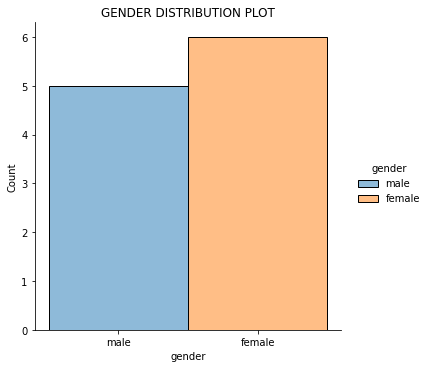

In [6]:
sns.displot(data=sort_df, x="gender", hue="gender",fill=True).set(title="GENDER DISTRIBUTION PLOT") 
plt.pyplot.savefig(r'F:\PROJECTS\survey_forms\Gen_dis',bbox_inches='tight')

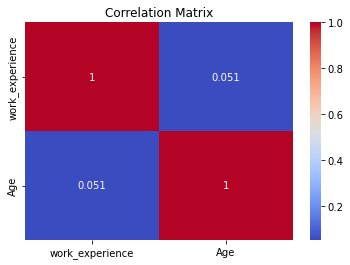

In [7]:
# co_mat= sort_df.corr()
corr_matrix =sns.heatmap(sort_df.corr(), cmap='coolwarm', annot=True).set(title="Correlation Matrix")
plt.pyplot.savefig(r'F:\PROJECTS\survey_forms\Corr_matrix',bbox_inches='tight')


In [ ]:
from flask import Flask, render_template, request,render_template_string
import mysql.connector

app = Flask(__name__,static_folder='F:/PROJECTS/survey_forms')

# MySQL Connection Configuration
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mech2013",
    database="details"
)
cursor = db.cursor()


html_form = '''
<!DOCTYPE html>
<html>
<head>
    <title>Survey Form</title>
    <!-- Bootstrap CSS CDN -->
    <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet">
    <style>
        /* Add additional CSS styles here */
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            padding: 20px;
        }
        .survey-count {
            position: absolute;
            top: 20px;
            right: 20px;
            background-color: #4CAF50;
            color: white;
            padding: 20px 10px;
            border-radius: 10px;
        }
        .survey-image {
            max-width: 100%;
            display: block;
            margin: 20px auto;
        }
        /* Additional styles */
    </style>
</head>
<body>
    <p class="survey-count">Survey Count = {{ survey_count }}</p>
    <div class="container">
        <h1 class="text-center">Survey Form</h1>
        <form action="/submit" method="post" class="mt-4">
            <div class="form-group">
                <label for="name">Name:</label>
                <input type="text" class="form-control" id="name" name="name">
            </div>
            <div class="form-group">
                <label for="dob">Date of Birth:</label>
                <input type="date" class="form-control" id="dob" name="dob">
            </div>
            <div class="form-group">
                <label for="education">Education:</label>
                <select class="form-control" id="education" name="education">
                    <option value="graduate">Graduate</option>
                    <option value="postgraduate">Postgraduate</option>
                </select>
            </div>
            <div class="form-group">
                <label for="experience">Work Experience:</label>
                <input type="number" class="form-control" id="experience" name="experience">
            </div>
            <div class="form-group">
                <label>Gender:</label>
                <div class="form-check">
                    <input class="form-check-input" type="radio" name="gender" id="male" value="male">
                    <label class="form-check-label" for="male">Male</label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="radio" name="gender" id="female" value="female">
                    <label class="form-check-label" for="female">Female</label>
                </div>
            </div>
            <button type="submit" class="btn btn-primary">Submit</button>
        </form>
        <div class="row">
            <div class="col-md-4">
                <img src="{{ url_for('static', filename='Age_dis.png') }}" class="survey-image">
            </div>
            <div class="col-md-4">
                <img src="{{ url_for('static', filename='Gen_dis.png') }}" class="survey-image">
            </div>
            <div class="col-md-4">
                <img src="{{ url_for('static', filename='Corr_matrix.png') }}" class="survey-image">
            </div>
        </div>
    </div>

    <!-- Bootstrap JS CDN (Optional) -->
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>
</body>
</html>
'''
def get_survey_count():
    cursor.execute("SELECT COUNT(*) FROM survey_data")
    count = cursor.fetchone()[0]
    return count

# def plot_graphs():
#     query='select * from details.survey_data'
#     df= pd.read_sql(sql=query , con =db)
#     df =df.drop(['id'], axis=1)
#     df ['Age'] = (pd.to_datetime("today").date()-df.iloc[:,1])// pd.Timedelta(days=365.25)
#     sort_df = df.sort_values(by =['Age'] , ascending=True,ignore_index=True)

@app.route('/')
def index():
    survey_count = get_survey_count()
    return render_template_string(html_form, survey_count= survey_count)

@app.route('/submit', methods=['POST'])
def submit():
    if request.method == 'POST':
        name = request.form['name']
        dob = request.form['dob']
        education = request.form['education']
        experience = request.form['experience']
        gender = request.form['gender']

        # Insert data into the database
        sql = "INSERT INTO survey_data (name, date_of_birth, education, work_experience, gender) VALUES (%s, %s, %s, %s, %s)"
        val = (name, dob, education, experience, gender)
        cursor.execute(sql, val)
        db.commit()

        return "Survey submitted successfully!"

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Dec/2023 12:20:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2023 12:20:25] "GET /survey_forms/Corr_matrix.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2023 12:20:25] "GET /survey_forms/Age_dis.png HTTP/1.1" 200 -
127.0.0.1 - - [14/Dec/2023 12:20:25] "GET /survey_forms/Gen_dis.png HTTP/1.1" 200 -


In [ ]:
df